<a href="https://colab.research.google.com/github/Ashishkumarpanda/Fake-News-Classifier/blob/master/BidirectionalRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
a = files.upload()

Saving train.csv to train.csv


In [79]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import one_hot
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Bidirectional,LSTM,Embedding
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.utils.vis_utils import plot_model

In [5]:
data = pd.read_csv("train.csv")
data.head(7)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1


In [6]:
data['title'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [12]:
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [16]:
data.dropna(inplace=True)
data.head(7)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0


In [17]:
data.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [45]:
x = data.drop('label',axis = 1)
x

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [46]:
y = data['label']
y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 18285, dtype: int64

In [47]:
print(x.shape,y.shape)

(18285, 4) (18285,)


In [42]:
message = x.copy()
message.reset_index(inplace= True)

In [43]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [55]:
ps=PorterStemmer()
corpus=[]
for i in range(len(message)):
  review=re.sub('[^a-zA-Z]',' ',message['title'][i])
  review=review.lower()
  review=review.split()

  review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
  review=' '.join(review)
  corpus.append(review)

In [56]:
print(data['title'][0])
#The data we got from dataset

House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It


In [57]:
corpus[0]
#data after cleaning

'hous dem aid even see comey letter jason chaffetz tweet'

In [60]:
voc_size = 5000
one_hot_r = [one_hot(word,voc_size) for word in corpus]
one_hot_r[0]
#data converted in to their one-hot representation

[957, 2802, 3190, 2435, 4505, 4173, 4986, 510, 98, 3784]

In [62]:
max_length = 20
embedded_docs = pad_sequences(one_hot_r,max_length,padding='pre')
#data converted to a fixed length by adding zeros
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  957,
       2802, 3190, 2435, 4505, 4173, 4986,  510,   98, 3784], dtype=int32)

In [65]:
#creating a Bidirectional LSTM model
dimension = 40
model = Sequential()
model.add(Embedding(voc_size,dimension,input_length=max_length))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer = 'adam' , metrics = ['accuracy'])

In [76]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               112800    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________


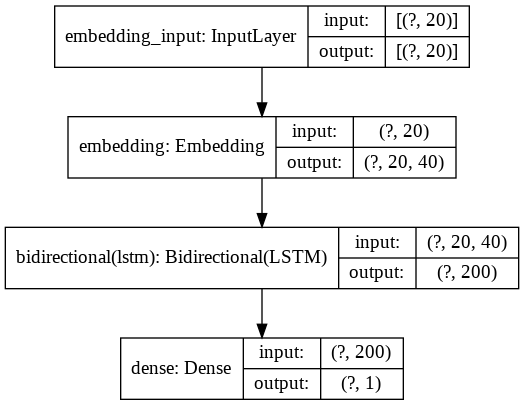

In [80]:
#The model 
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [67]:
final_x = np.array(embedded_docs)   #message
final_y = np.array(y)               #true or false label

In [68]:
print(final_x.shape,final_y.shape)

(18285, 20) (18285,)


In [81]:
x_train, x_test, y_train, y_test = train_test_split(final_x, final_y, test_size=0.33, random_state=42)

In [82]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=64,epochs=20)

Epoch 1/20
192/192 [==============================] - 8s 43ms/step - loss: 0.2933 - accuracy: 0.8595 - val_loss: 0.1943 - val_accuracy: 0.9183
Epoch 2/20
192/192 [==============================] - 7s 39ms/step - loss: 0.1366 - accuracy: 0.9477 - val_loss: 0.1935 - val_accuracy: 0.9200
Epoch 3/20
192/192 [==============================] - 7s 39ms/step - loss: 0.0983 - accuracy: 0.9642 - val_loss: 0.2493 - val_accuracy: 0.9178
Epoch 4/20
192/192 [==============================] - 7s 38ms/step - loss: 0.0730 - accuracy: 0.9739 - val_loss: 0.2590 - val_accuracy: 0.9153
Epoch 5/20
192/192 [==============================] - 7s 39ms/step - loss: 0.0552 - accuracy: 0.9811 - val_loss: 0.2800 - val_accuracy: 0.9082
Epoch 6/20
192/192 [==============================] - 8s 40ms/step - loss: 0.0404 - accuracy: 0.9865 - val_loss: 0.3437 - val_accuracy: 0.9070
Epoch 7/20
192/192 [==============================] - 8s 40ms/step - loss: 0.0274 - accuracy: 0.9911 - val_loss: 0.4363 - val_accuracy: 0.9085

In [ ]:
y_pred = model.predict_classes(x_test)

In [84]:
metrics.confusion_matrix(y_test,y_pred)

array([[3117,  302],
       [ 252, 2364]])

In [87]:
metrics.classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.93      0.91      0.92      3419\n           1       0.89      0.90      0.90      2616\n\n    accuracy                           0.91      6035\n   macro avg       0.91      0.91      0.91      6035\nweighted avg       0.91      0.91      0.91      6035\n'

In [89]:
print("accuracy is =",str(metrics.accuracy_score(y_test,y_pred) * 100)+"%")

accuracy is = 90.8202154101077%
